# Multiple Linear Regression

## Table of Contents:

1. [Multiple Linear Regression](#Multiple-Linear-Regression)
2. [Linear Algebra Approach to Regression](#Linear-Algebra-Approach-to-Regression)
3. [Least Squares Solution through MLE](#Least-Squares-Solution-through-MLE)
4. [Alternatives to Matrix Inversion for Least Squares](#Alternatives-to-Matrix-Inversion-for-Least-Squares)
5. [Inferences on Least Squares Estimated Parameters](#Inferences-on-Least-Squares-Estimated-Parameters)
6. [Summary](#Summary)
7. [Citations](#Citations)

### Multiple Linear Regression

Multiple linear regression involves several feature variables instead of just one. For example, test scores can be the related to the amount of time someone spent both studying and sleeping before an exam. The linear regression model for multiple feature variables can be written like this:

\begin{equation}
Y = b_0 + b_1 X_1 + b_2 X_2 + ... + b_k X_k
\end{equation}

Again, we need to add an error term to the end:

\begin{equation}
Y = b_0 + b_1 X_1 + b_2 X_2 + ... + b_k X_k + \varepsilon
\end{equation}

The same techniques can also be used for **polynomial regression**, where powers/products of the feature variable are summed:

\begin{equation}
Y = b_0 + b_1 X + b_2 X^2 + ... + b_k X^k + \varepsilon
\end{equation}

We can treat each $X^j$ as a new feature variable and use the same techniques developed for multiple linear regression to estimate the parameters for the model.

[(back to top)](#Table-of-Contents:)

### Linear Algebra Approach to Regression

Since we are dealing with multiple variables, it becomes easier to cast the problem in a linear algebra form. Let's make each $Y$ value in the original data as $Y_i$, where $i = 1, ..., n$. Each $Y_i$ can be described by the design variables like so:

\begin{equation}
Y_1 = b_0 + b_1 X_{1, 1} + b_2 X_{2, 1} + ... + b_k X_{k, 1}
\end{equation}

\begin{equation}
Y_2 = b_0 + b_1 X_{1, 2} + b_2 X_{2, 2} + ... + b_k X_{k, 2}
\end{equation}

\begin{equation}
...
\end{equation}

\begin{equation}
Y_n = b_0 + b_1 X_{1, n} + b_2 X_{2, n} + ... + b_k X_{k, n}
\end{equation}

We can recast this system of equations as this:

\begin{equation}
\begin{bmatrix}
Y_1 \\
Y_2 \\
... \\
Y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & X_{1, 1} & X_{2, 1} & ... & X_{k, 1} \\
1 & X_{1, 2} & X_{2, 2} & ... & X_{k, 2} \\
... & ... & ... & ... & ... \\
1 & X_{1, n} & X_{2, n} & ... & X_{k, n} \\
\end{bmatrix}
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
... \\
b_n
\end{bmatrix}
\end{equation}

\begin{equation}
\text{Response vector} = \text{Design matrix} \times \text{Coefficient vector}
\end{equation}

\begin{equation}
\mathbf{\vec{y}} = \mathbf{X} \mathbf{\vec{b}}
\end{equation}

The **design matrix** holds the values from the feature variables found in the original data. The column of $1$'s was added to the design matrix to account for the intercept $b_0$ term. The **response vector** holds the values of $Y$ as a column. The **coefficient vector** holds the $b_i$ variables as a column.

[(back to top)](#Table-of-Contents:)

### Least Squares Solution through MLE

**Maximum likelihood estimation (MLE)** is a technique to estimate parameters based on the actual data observed. The parameters are given a range of values and the probability of each value, known as the **likelihood**, is calculated. The parameter is then assigned the value at which the likelihood is the maximum.

Remember, we said that the error terms for each $Y_i$ value was a Gaussian distribution. Thus, the actual value of $Y_i$ has a Gaussian distribution as well. The equation for a Gaussian distribution is as follows:

\begin{equation}
f(y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left({- \frac{(y - \mu)^2}{2 \sigma^2}}\right)
\end{equation}

We established before that the mean ($\mu$) of each $Y_i$ distribution is $\widehat{y}_i$. Since $\widehat{y}_i = \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i}$, we can write the MLE for one $Y_i$ value as:

\begin{equation}
f(y_i) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left({- \frac{\left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_1 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}}\right)
\end{equation}

Going under the assumption that each $Y_i$ is independent from each other, we can multiply the probability $f(y_i)$ of each $i = 1, ..., n$ to get the **joint probability distribution** of having seen $y_1, ..., y_n$:

\begin{equation}
f\left(\mathbf{\vec{y}}\right) = \prod_{i = 1}^{n} f(y_i) = \left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right)^n \exp\left({- \frac{\sum_{i = 1}^{n} \left(y_i - \left (\widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}}\right)
\end{equation}

The function $f(x) = \exp(-x)$, where $x$ would be a placeholder for $\frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}$ in this case, looks like this for positive real numbers:

<img src="files/images/exp(-x)%20graph.png">

Notice that the highest value of $f(x) = \exp(-x)$ occurs at $x = 0$ and any value where $x > 0$ is monotonically decreasing. This means that the highest probability in the joint probability distribution occurs where $\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2$ is the minimum. Notice that $\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2 = SSE$. Therefore, to maximize the joint probability distribution is to minimize the SSE, which was the same objective that we achieved in simple linear regression. This idea can be made even more explicit if we consider the log-likelihood of the joint distribution:

\begin{align}
ln\left(f(\mathbf{\vec{y}})\right) &= ln\left(\left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right)^n \exp\left({- \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}}\right)\right) \\
                                   &= ln\left(\left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right)^n\right) + ln\left(\exp\left({- \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}}\right)\right)\\
                                   &= ln\left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right)n - \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}\\
                                   &= ln\left(\frac{1}{(2 \pi \sigma^2)^\frac{1}{2}}\right)n - \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}\\
                                   &= \left[ln\left(1\right) - ln\left((2 \pi \sigma^2)^\frac{1}{2}\right)\right]n - \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}\\
                                   &= \left[0 - \frac{ln\left((2 \pi \sigma^2\right)}{2}\right]n - \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2}\\
                                   &= - \frac{n}{2} ln \left(2 \pi \sigma^2 \right) - \frac{\sum_{i = 1}^{n} \left(y_i - \left( \widehat{b}_0 + \widehat{b}_1 x_{1, i} + \widehat{b}_2 x_{2, i} + ... + \widehat{b}_k x_{k, i} \right) \right)^2}{2 \sigma^2} \\
                                   &= - \frac{n}{2} ln \left(2 \pi \sigma^2 \right) - \frac{SSE}{2 \sigma^2} \\
                                   &= CONSTANT + SSE
\end{align}

The log-likelihood is easier to work with than the regular joint distribution because it changes multiplication terms into addition terms. When we take a derivative of the joint distribution, we need to take into account the chain rule and the product rule. However, when we take a derivative of the log-likelihood, we can just take the derivative of each addition term separately. Looking at the end result we found, we see that the log-likelihood is just the sum of a scaled $SSE$ and a constant term. Since the constant term is set, we see that to minimize the log-likelihood, we have to minimize the $SSE$.

The SSE can be written in vector format:

\begin{equation}
SSE = \sum_{i = 1}^{n} \left(y_i - \mathbf{\vec{x}_i} \mathbf{\vec{b}} \right)^2
\end{equation}

where $\mathbf{\vec{x}_i}$ is the vector of observed values for a particular subject (including a value of $1$ for the intercept) and $\mathbf{\vec{b}}$ is the column vector of weights. Using this notation and some mathematical trickery, we can expand out the SSE:

\begin{align}
SSE &= \left(\mathbf{\vec{y}} - \mathbf{X} \mathbf{\vec{b}}\right)^{T}\left(\mathbf{\vec{y}} - \mathbf{X} \mathbf{\vec{b}}\right) \\
    &= \mathbf{\vec{b}}^{T} \left(\mathbf{X}^{T}\mathbf{X}\right)\mathbf{\vec{b}} - \mathbf{\vec{b}}^{T} \left(\mathbf{X}^{T}\mathbf{\vec{y}}\right)
\end{align}

Taking the gradient of this expansion with respect to $\mathbf{\vec{b}}$ and setting that gradient to $0$ leaves:

\begin{equation}
\nabla(SSE) = \left(\mathbf{X}^{T}\mathbf{X}\right)\mathbf{\vec{b}} - \left(\mathbf{X}^{T}\mathbf{\vec{y}}\right) = \mathbf{\vec{0}}
\end{equation}

If we now solve for $\mathbf{\vec{b}}$, we get:

\begin{equation}
\mathbf{\widehat{\vec{b}}} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\left(\mathbf{X}^{T}\mathbf{\vec{y}}\right)
\end{equation}

This equation is known as the **normal equation**. There is a geometric/vector meaning to it, but that will not be covered here. For more information on the least squares problem, refer to [3]. Given an invertible matrix $\left(\mathbf{X}^{T}\mathbf{X}\right)$ and few predictor variables, the normal equation can be solved by hand to get the coefficient estimates.

[(back to top)](#Table-of-Contents:)

## Alternatives to Matrix Inversion for Least Squares

The inversion of $\left(\mathbf{X}^{T}\mathbf{X}\right)$ is very computationally intensive in medium-sized to large datasets, and sometimes impossible. Many algorithms exist to search the coefficient space for reasonable estimates without having to go through the normal equation. The scope of these algorithms is above this document and will not be covered here. Below is a list of common algorithms organized by type:

* gradient descent
    * grid-search method
    * gradient-serach method
    * expansion methods
    * Levenberg-Marquardt method
    
[(back to top)](#Table-of-Contents:)

### Inferences on Least Squares Estimated Parameters

Each estimated value $\widehat{b}_i$ and $\widehat{y}_i$ also possess a distribution from which we can draw inferences on. In this section, common distribution properties are found for each of the estimators. Their derivations will not be described here, but can be found in [2] for those interested.

The unbiased estimate of $\sigma^2$ is

\begin{equation}
    s^2 = \frac{SSE}{n - k - 1} = \frac{\sum_{i = 1}^{n} (y_i - \widehat{y}_i)^2}{n - k - 1}
\end{equation}

The t-statistic used is:

\begin{equation}
t = \frac{b_j - \widehat{b}_{ji}}{s\sqrt{c_{jj}}}
\end{equation}

where $c_{jj}$ is taken from the variance-covariance matrix (a $3 x 3$ matrix was used for brevity):

\begin{equation}
\left(\mathbf{X}^T \mathbf{X} \right)^{-1} = 
    \begin{bmatrix}
        c_{11} & c_{12} & c_{13} \\
        c_{21} & c_{22} & c_{23} \\
        c_{31} & c_{32} & c_{33} 
    \end{bmatrix}
\end{equation}

All t-statistic values use $n - k - 1$ degrees of freedom.

The properties of $\widehat{y}_i$ are as follows:

<table>
    <tr>
        <td>**mean**</td>
        <td>$\mu_{\widehat{y}_i|\mathbf{\vec{x}_i}} = \mathbf{\vec{x}_i}\mathbf{\vec{b}}$</td>
    </tr>
    <tr>
        <td>**variance**</td>
        <td>$\sigma^2_{\widehat{y}_i|\mathbf{\vec{x}_i}} = \sigma^2$</td>
    </tr>
    <tr>
        <td>**confidence interval bounds**</td>
        <td>$\widehat{y}_i \pm t_{\alpha/2} s \sqrt{\mathbf{\vec{x}_i}^T \left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{\vec{x}_i}}$</td>
    </tr>
    <tr>
        <td>**prediction interval bounds**</td>
        <td>$\widehat{y}_i \pm t_{\alpha/2} s \sqrt{1 + \mathbf{\vec{x}_i}^T \left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{\vec{x}_i}}$</td>
    </tr>
</table>

The properties of $\widehat{b}_i$ are as follows:

<table>
    <tr>
        <td>**mean**</td>
        <td>$\mu_{\widehat{b}_i} = \widehat{b}_i$</td>
    </tr>
    <tr>
        <td>**covariance**</td>
        <td>$Cov\left\{\mathbf{\widehat{\vec{b}}}\right\} = \sigma^2 \left(\mathbf{X}^T \mathbf{X} \right)^{-1}$</td>
    </tr>
    <tr>
        <td>**confidence interval bounds**</td>
        <td>$\widehat{b}_i \pm t_{\alpha/2} s_{\widehat{b}_i}$</td>
    </tr>
    <tr>
        <td>**hypothesis testing against $H_0: b_i = b_{i0}$**</td>
        <td>t-statistic: $t = \frac{b_i - b_{i0}}{s \sqrt{c_{ii}}}$</td>
    </tr>
</table>

[(back to top)](#Table-of-Contents:)

### Linear Regression as Analysis of Variance

Analysis of variance for multiple linear regression works in much the same was as for simple linear rergession. Similarly, we want the model to explain as much of the data as possible. Thus, we want the ratio between SSR to SSE to be large. Take the null hypothesis $H_0: b_1 = b_2 = ... = b_k = 0$. This essentially says that none of the data is explained by the model. The alternate hypothesis states that $H_1: b_i \neq 0$, meaning that any of the $b_i$ could not be $0$. This indicates that at least some of the data is explained by the model. To turn the sum of squares functions into true variance functions, we divide each sum of squares term by its degrees of freedom. This result is known as the **mean square**:

\begin{equation}
MS_{SSR} = \frac{SSR}{k}
\end{equation}

\begin{equation}
MS_{SSE} = \frac{SSE}{n - k - 1}
\end{equation}

The f-statistic, then, is the ratio of the two mean square terms:

\begin{equation}
f = \frac{MS_{SSR}}{MS_{SSE}} = \frac{\frac{SSR}{k}}{\frac{SSE}{n - k - 1}} = \frac{n - k - 1}{k} \frac{SSR}{SSE}
\end{equation}

The f-statistic is represented by an $F$-distribution with $n - 2$ degrees of freedom. We can display the sum of squares information as the following table:

<table>
    <tr>
        <td>**source of variation**</td>
        <td>**sum of squares**</td>
        <td>**degrees of freedom**</td>
        <td>**mean square**</td>
        <td>**f-statistic**</td>
    </tr>
    <tr>
        <td>regression</td>
        <td>$SSR$</td>
        <td>$k$</td>
        <td>$\frac{SSR}{k}$</td>
        <td>$\frac{n - k - 1}{k} \frac{SSR}{SSE}$</td>
    </tr>
    <tr>
        <td>error</td>
        <td>$SSE$</td>
        <td>$n - k - 1$</td>
        <td>$s^2 = \frac{SSE}{n - k -1}$</td>
        <td></td>
    </tr>
    <tr>
        <td>**total**</td>
        <td>$SST$</td>
        <td>$n - 1$</td>
        <td></td>
        <td></td>
    </tr>
</table>

Using the information on this table, we see that the f-statistic is:

\begin{equation}
f = \frac{MS_{SSR}}{MS_{SSE}} = \frac{n - k - 1}{k} \frac{SSR}{SSE}
\end{equation}

$H_0$ can be rejected if $f > f_\alpha(k, n - k - 1)$. if $H_0$ is ultimately rejected, we can conclude that the proposed model **does** explain much of the variance that can be found in the original data.

[(back to top)](#Table-of-Contents:)

### Linear Regression Example through SAS

As a simple demonstration, let's use SASHELP.CLASS as an example dataset. We will compare age and height to weight values for all the students to determine whether teenagers get heavier as they get older.

The dataset values look like this:

In [1]:
title "Age and Height vs. Weight for SASHELP.CLASS";
proc print data = sashelp.class (obs = 8);
    var age height weight;
run;

Obs,Age,Height,Weight
1,14,69.0,112.5
2,13,56.5,84.0
3,13,65.3,98.0
4,14,62.8,102.5
5,14,63.5,102.5
6,12,57.3,83.0
7,12,59.8,84.5
8,15,62.5,112.5


PROC REG is the most general out of all of the different regression procedures in SAS. This is the one that we will be using for the current example. Its syntax is as follows:

    proc reg data = <dataset>;
        model <response variable> = <feature variable list>;
    run;
    
Specify the dataset to be used in the PROC REG statement equated to the DATA option. Then, use the MODEL statement to set the response variable to be equal to a list of the feature variables.

The model that we want to estimate is the following:

\begin{equation}
WEIGHT_i = b_0 + b_1 AGE_i + b_2 HEIGHT_i
\end{equation}

PROC REG will give us our parameter estimates $\widehat{b}_0$, $\widehat{b}_1$ and $\widehat{b}_2$.

Let's try this on the SASHELP.CLASS dataset:

In [2]:
ods graphics on;
proc reg data = sashelp.class plots = none;
    model weight = age height;
run;
ods graphics off;

Looking at the coefficients:

In [1]:
ods graphics on;
proc reg data = sashelp.class plots = none;
    model weight = age height;
    ods select ParameterEstimates;
run;
ods graphics off;

We have found $\widehat{b}_0 = -141.224$, $\widehat{b}_1 = 1.278$, and $\widehat{b}_2 = 3.597$ making the following our model:

\begin{equation}
WEIGHT_i = -141.224 + 1.278 (AGE_i) + 3.597 (HEIGHT_i)
\end{equation}

This equation signifies that the average weight per age and height is close to 3.5x that of the height value plus a person's lage offset by 141.

The sum of squared error in our model amounts to $SSE = 2120.0997$. This represents the total squared deviation of our data from our predicted means. 

All SAS regression procedures test parameters against a null hypothesis value of 0. This means that for $\widehat{b}_i$:

\begin{matrix}
H_{0, b_i}: b_i = 0 \\
H_{1, b_i}: b_i \neq 0
\end{matrix}

If $H_0$ holds true for either parameter, this means that the feature variable associated with that parameter is being multiplied by 0. Thus, that particular feature variable has no effect on the value of the response variable and is effectively taken out of the model.

To test the null hypothesis, SAS uses the t-statistic and finds its p-value. t-statistic expressions can be found from the equations for each parameter in section 4. Usually, p-values are compared against $\alpha = 0.05$. If the p-value is above $0.05$, then the null hypothesis ($H_0$) cannot be rejected. If the p-value is below $0.05$, then the null hypothesis ($H_0$) is rejected for the alternate hypothesis ($H_1$).

The p-values for $\widehat{b}_i$ can be found under the "Pr > |t|" heading in the "Parameter Estimates" table. Given the small values for $\widehat{b}_0$ and $\widehat{b}_2$ , it can be concluded that neither the intercept or the HEIGHT variable can be taken out of the model. However, AGE has a non-significant p-value. This means that the AGE variable have a big impact on the explanatory nature of the model.

As a check using the analysis of variance method:

In [2]:
ods graphics on;
proc reg data = sashelp.class plots = none;
    model weight = age height;
    ods select ANOVA;
run;
ods graphics off;

we see that the model's f-value is $27.23$ with a small p-value in the "Analysis of Variance" table, indicating that much of the variance found in the original data can be explained by the model. This lends credence to our model being a good fit to the data.

Let's take a moment to take out the AGE variable from our model:


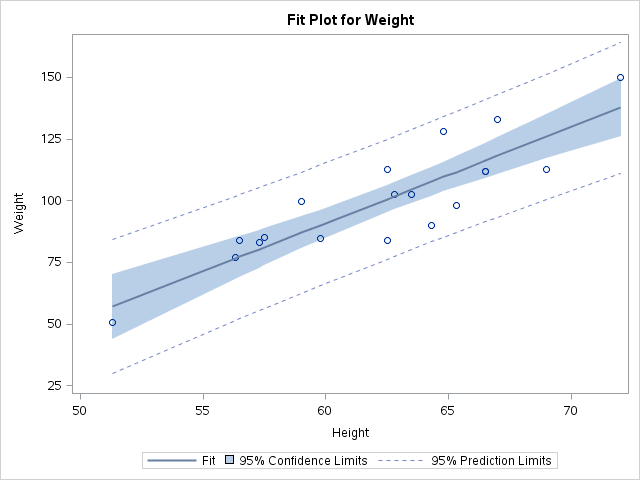

In [5]:
ods graphics on;
proc reg data = sashelp.class plots(only) = (fit(stats=none));
    model weight = height;
run;
ods graphics off;

Looking at the parameter estimates now:

In [6]:
ods graphics on;
proc reg data = sashelp.class plots = none;
    model weight = height;
    ods select ParameterEstimates;
    ods show;
run;
ods graphics off;

we have now found $\widehat{b}_0 = -143.027$, $\widehat{b}_1 = 3.899$, making the following our model:

\begin{equation}
WEIGHT_i = -143.027 + 3.899 (HEIGHT_i)
\end{equation}

An ANOVA gives:

In [7]:
ods graphics on;
proc reg data = sashelp.class plots = none;
    model weight = height;
    ods select ANOVA;
    ods show;
run;
ods graphics off;

Now, our "Analysis of Variance" f-value is $57.08$, meaning that this model is very significant in its explanatory nature. As a check, both coefficients are also significant.

Choosing sound variables to use in a model will be covered in a separate model selection document.

[(back to top)](#Table-of-Contents:)

### Summary

In this document, we learned:
* how to form multiple linear regression problems as matrices
* how to derive the normal equation
* how to perform and interpret inference tests for estimated parameters
* how to run a multiple linear regression in SAS

Key equations:
* $SSE = \sum_{i = 1}^{n} \left(y_i - \mathbf{\vec{x}_i} \mathbf{\vec{b}} \right)^2$
* $\mathbf{\widehat{\vec{b}}} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\left(\mathbf{X}^{T}\mathbf{\vec{y}}\right)$

[(back to top)](#Table-of-Contents:)

### Citations

[1] J. L. Devore, “Simple Linear Regression and Correlation,” in *Probability and Statistics for Engineering and the Sciences*, 8th ed. Boston, USA: Brooks/Cole, 2012, ch. 12, sec. 1, pp. 473.

[2] R. E. Walpole, R. H. Myers, S. L. Myers, K. Ye, in *Probability & Statistics for Engineers & Scientists*, 9th ed. Boston, USA: Pearson Education, Inc., 2012, ch. 11, sec. 4-6, pp. 400-413.

[(back to top)](#Table-of-Contents:)